步骤 1：加载数据集
运行 A 部分的代码（加载 CIFAR-10 数据集并显示部分图像
-------------------作用：加载 CIFAR-10 数据集，并显示前 25 张图像。
-------------------输出：你会看到 25 张 CIFAR-10 数据集的图像。

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


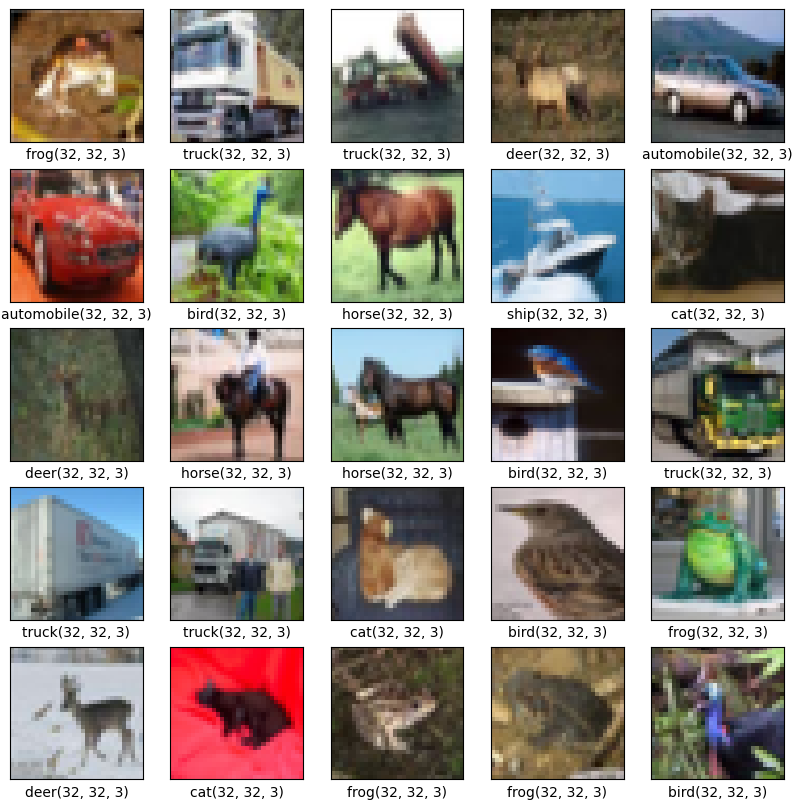

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 下载数据集
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# 归一化像素值到 [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# 显示部分图像
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]] + str(np.shape(train_images[i])))
plt.show()

步骤 2：图像增强
运行 B 部分的代码（图像增强）：

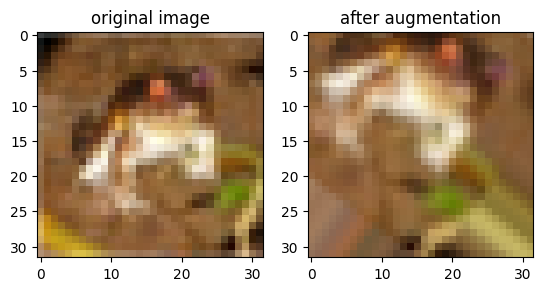

In [2]:
def single_image_augment(train_images, image_index):
    # 对单张图像进行增强
    data = train_images[image_index]
    plt.figure()
    plt.subplot(1,2,1)
    image_single = data
    plt.grid(False)
    plt.imshow(data.reshape(32,32,3), vmin=0, vmax=255)
    plt.title('original image')
    data = data.reshape(1,32,32,3)
    train_datagen = ImageDataGenerator(rotation_range=90,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      data_format='channels_last')
    train_datagen.fit(data)
    gen_flow = train_datagen.flow(data)
    image = next(gen_flow)
    image_single = image.reshape(32,32,3)
    plt.subplot(1,2,2)
    plt.grid(False)
    plt.imshow(image_single, vmin=0, vmax=255)
    plt.title('after augmentation')
    plt.show()
    return image

image_augmented = single_image_augment(train_images, 0)
image_augmented = image_augmented.reshape(32,32,3)

步骤 3：构建基线模型
运行 C 部分的代码（构建包含归一化和 Dropout 的基线模型）：

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ group_normalization                  │ (None, 32, 32, 32)          │              64 │
│ (GroupNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 8)           │           2,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ group_normalization_1                │ (None, 4, 4, 8)             │              16 │
│ (GroupNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,194 (47.63 KB)

 Trainable params: 12,194 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

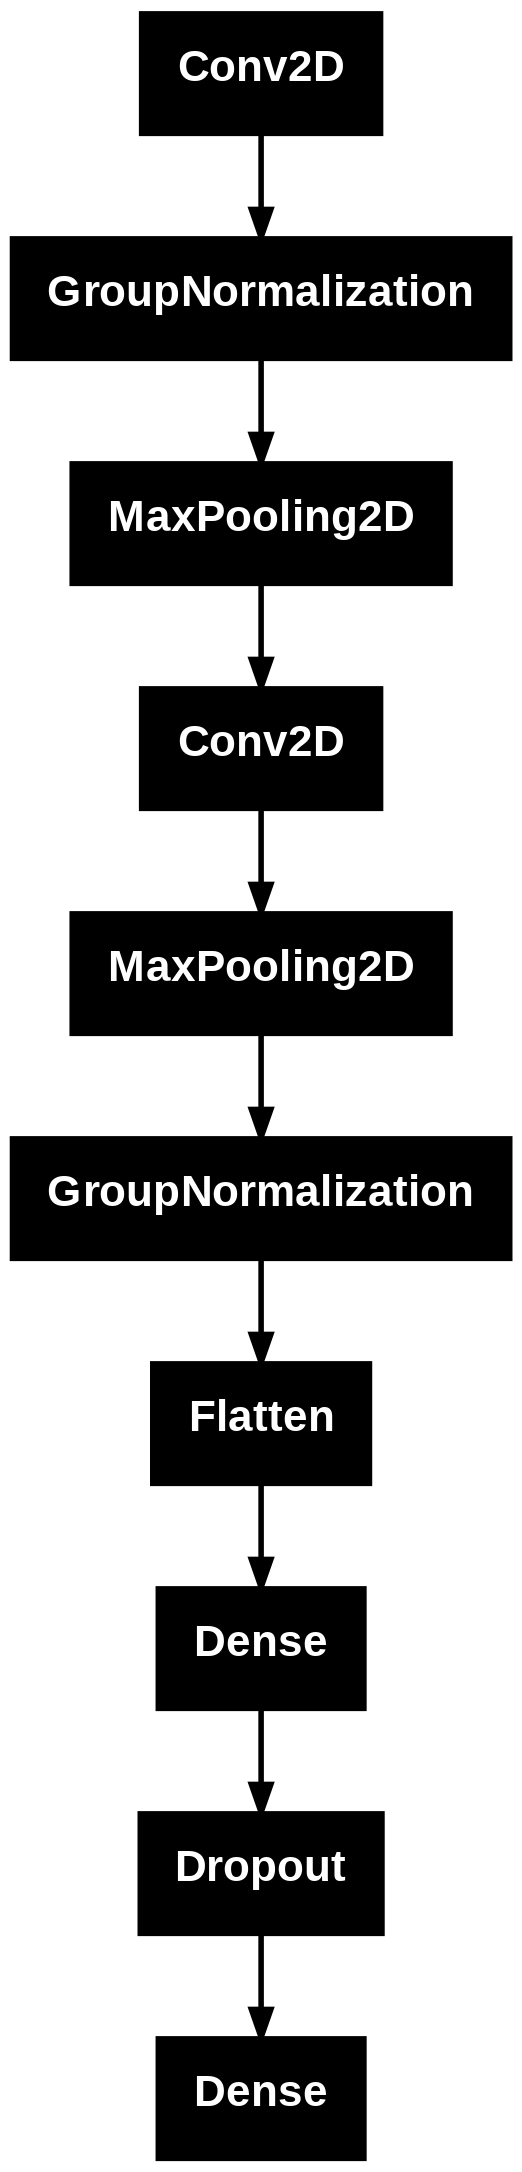

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import plot_model

# 构建 CNN 模型
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(tf.keras.layers.GroupNormalization(groups=32, axis=3))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((4, 4)))
model.add(tf.keras.layers.GroupNormalization(groups=2, axis=3))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

model.summary()

# 显示网络结构
plot_model(model, to_file='model.png')

步骤 4：训练和评估基线模型
运行以下代码来训练和评估基线模型：

In [ ]:
# 编译模型
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 训练模型
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# 评估模型
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Baseline Model - Test accuracy: {test_acc}")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.2554 - loss: 2.0505 - val_accuracy: 0.4956 - val_loss: 1.3976
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4640 - loss: 1.4922 - val_accuracy: 0.5489 - val_loss: 1.2513
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5136 - loss: 1.3498 - val_accuracy: 0.5845 - val_loss: 1.1568
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5482 - loss: 1.2708 - val_accuracy: 0.5916 - val_loss: 1.1397
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5651 - loss: 1.2258 - val_accuracy: 0.6087 - val_loss: 1.0922
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5818 - loss: 1.1795 - val_accuracy: 0.6221 - val_loss: 1.0779
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5894 - loss: 1.1570 - val_accuracy: 0.6246 - val_loss: 1.0528
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5990 - loss: 1.134